# **Project Name**    - Exploratory Data Analysis on Glassdoor website Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member 1 -** Shanmmuganathan.S


# **Project Summary -**

In today's competitive job market, understanding salary trends is crucial for job seekers, employers, and analysts. This project aims to analyze salary distributions and trends using the Glassdoor Jobs Dataset (2017-2018). The dataset contains job postings with key details like job title, company size, location, industry, salary estimates, and company ratings.

The objectives of this study are:

1. To explore how salaries vary across job positions (e.g., Data Scientist vs. Software Engineer).

2. To analyze the impact of company size on salary structures.

3. To examine regional differences in salaries.

4. To build a predictive model for estimating salaries based on job attributes.
The dataset was cleaned and processed to extract meaningful insights. The Salary Estimate column was converted into numerical values for minimum, maximum, and average salaries. Categorical variables like Company Size and Revenue were standardized for better analysis. Additional features like Company Age were created.

We employed Exploratory Data Analysis (EDA) using:

* Univariate Analysis: Examined salary distributions.
* Bivariate Analysis: Compared salary trends across job titles, locations, and industries.
* Multivariate Analysis: Identified interactions between multiple job factors.

Key findings:

* Job Role Matters: AI & ML engineers earn the highest salaries, while general data analysts are lower paid.
* Location Impacts Salary: Major tech hubs (San Francisco, New York) offer significantly higher salaries than other locations.
* Company Size Influence: Large corporations tend to pay higher salaries compared to small startups.
* Industry Trends: AI, Finance, and Healthcare industries offer the best salaries.

Finally, we explore predictive modeling to estimate salaries based on job attributes. The findings are valuable for job seekers (salary expectations), employers (competitive salaries), and policymakers (market trends).

# **GitHub Link -**

[GitHub Link](https://github.com/Shanmuganathan2004/Labmentix-Internship/tree/main/WEEK-1)

# **Problem Statement**


In the rapidly evolving tech industry, salary expectations vary significantly based on job role, location, company size, and industry. Job seekers, employers, and policymakers need data-driven insights to understand salary structures and make informed decisions.

This project aims to analyze salary trends and predict salaries using Glassdoor job postings (2017-2018). Key questions we address:

1. How do salaries vary by job position (e.g., Data Scientist vs. Software Engineer vs. DevOps Engineer)?
2. What is the impact of company size on salary levels?
3. How do salaries differ by location (e.g., San Francisco vs. Austin vs. New York)?
4. Can we build a predictive model to estimate salaries based on job attributes?

#### **Define Your Business Objective?**

Our analysis provides insights for different stakeholders:

* Job Seekers: Understand salary expectations for various tech roles.
* Employers: Set competitive salaries to attract and retain talent.
* Recruiters: Benchmark salaries and ensure fair compensation.
* Analysts & Researchers: Study salary trends by industry, experience, and geography.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [43]:
# Load Dataset
df = pd.read_csv("D:\LabMentix-Intern\GitHub-Repo\Labmentix-Internship\WEEK-1\glassdoor_jobs.csv")  # Load the dataset


<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\natha\AppData\Local\Temp\ipykernel_19324\2163060665.py:2: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv("D:\LabMentix-Intern\GitHub-Repo\Labmentix-Internship\WEEK-1\glassdoor_jobs.csv")  # Load the dataset


### Dataset First View

In [44]:
# Dataset First Look
df.head()  # Display the first 5 rows


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [45]:
# Dataset Rows & Columns
df.shape  # Returns (number of rows, number of columns)


(956, 15)

### Dataset Information

In [46]:
# Dataset Info
df.info()  # Summary of dataset (column names, data types, missing values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [47]:
# Dataset Duplicate Value Count
df.duplicated().sum()  # Count of duplicate rows


0

#### Missing Values/Null Values

In [48]:
# Missing Values/Null Values Count
df.isnull().sum()  # Count of missing values in each column


Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [49]:
# if you don't have missingno package install it as pip install missingno


In [50]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


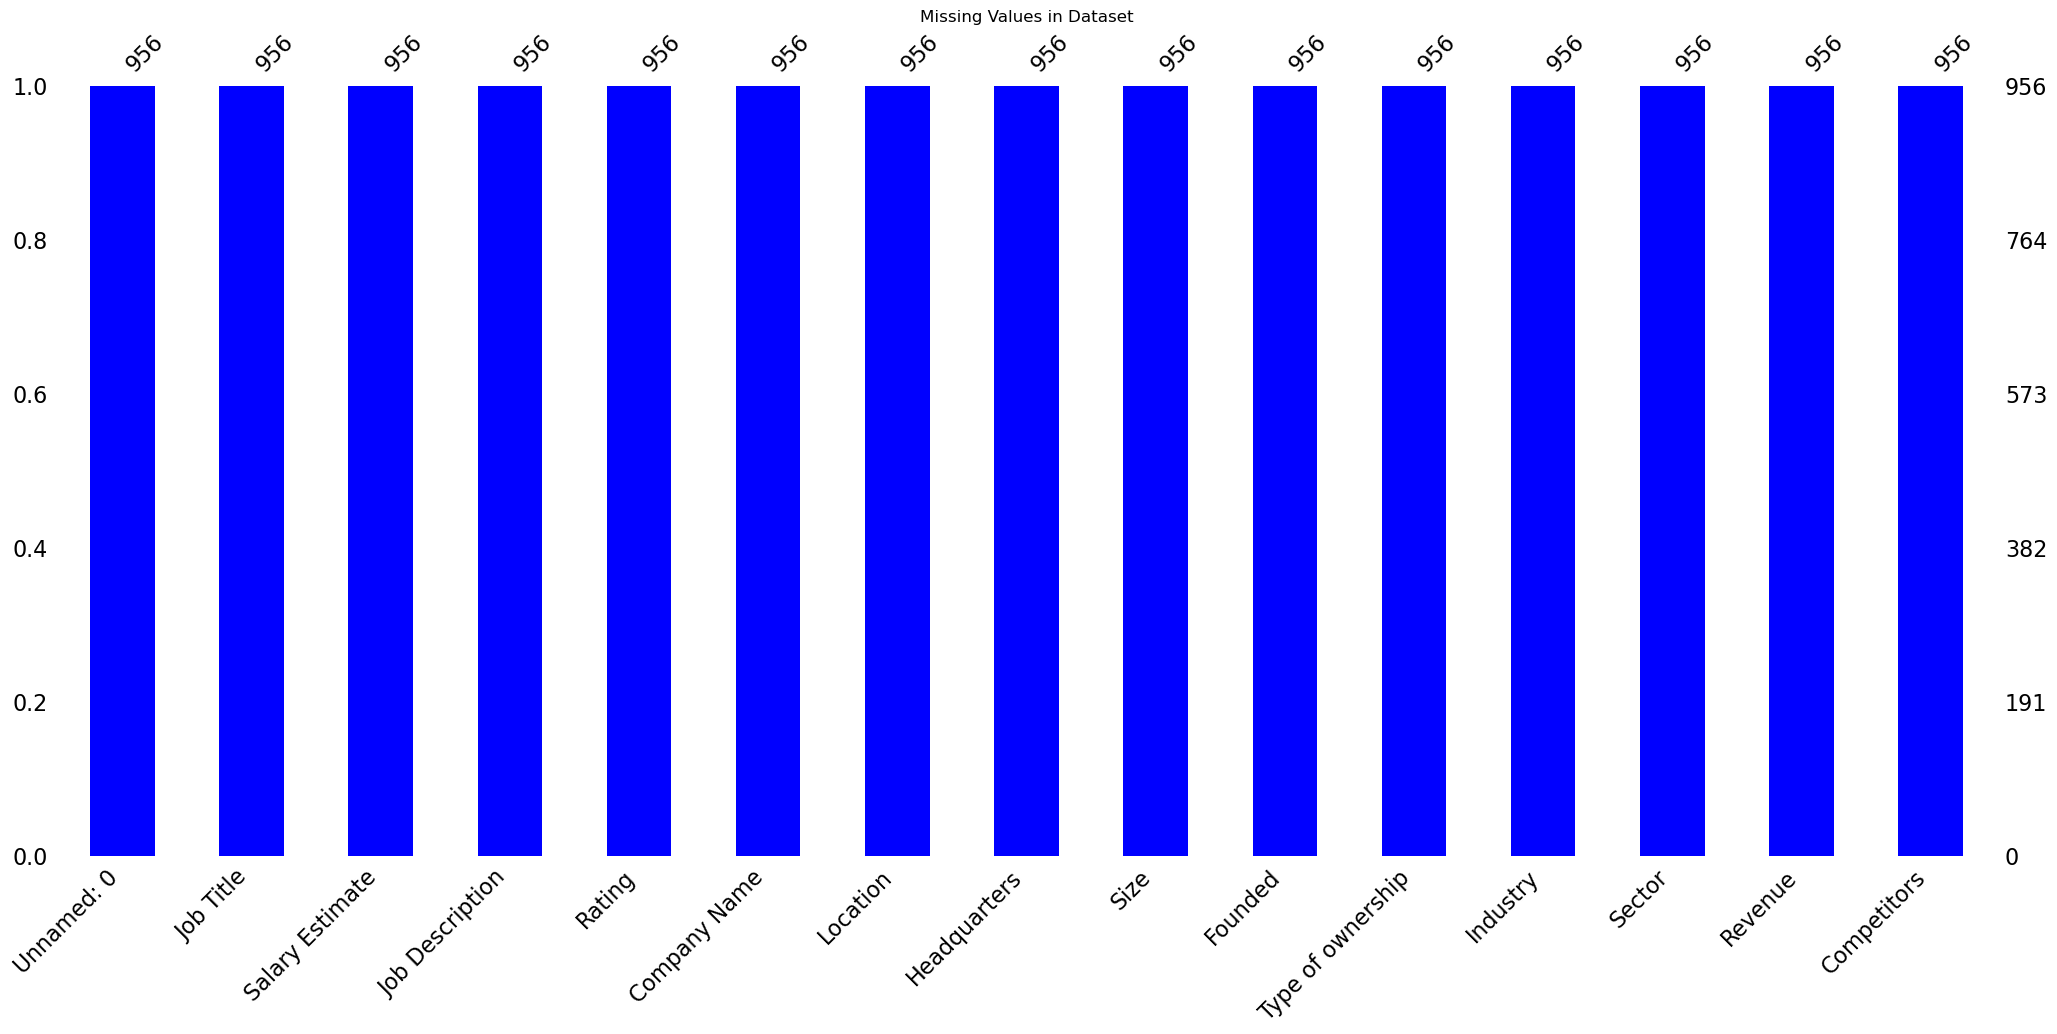

In [51]:


# Visualizing the missing values
import missingno as msno

# Visualizing missing values
plt.figure(figsize=(10, 5))
msno.bar(df, color="blue")
plt.title("Missing Values in Dataset")
plt.show()


### What did you know about your dataset?

The dataset contains job postings from Glassdoor (2017-2018) with details about job titles, salaries, company information, and more.

Initial Observations
Key Columns:
* Job Title (e.g., Data Scientist, Healthcare Data Scientist)
* Salary Estimate (e.g., "$53K-$91K (Glassdoor est.)")
* Job Description
* Company Name
* Location
* Size, Founded, Industry, Sector, Revenue
Rating (Company rating)
* Competitors (List of competitors)

Potential Issues:

The Salary Estimate column includes text and symbols.
Some missing or placeholder values (e.g., -1 in Competitors).
So data needs cleaning before analysis.

## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [53]:
# Dataset Describe
df.describe()


,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

* **Job Title** - Object - Title of the job position (e.g., Data Scientist, ML Engineer).
* **Min Salary** - Integer - Lower range of the estimated salary.
* **Max Salary** - Integer - Upper range of the estimated salary.
* **Avg Salary** - Float - The average of Min and Max salary.
* **Job Description** - Object - Details about job responsibilities and requirements.
* **Rating**  - Float - Company rating on Glassdoor (0 - 5).
* **Company Name** - Object - Name of the hiring company (cleaned).
* **Location**	- Object - City and state of job
* **Headquarters** -	Object - 	Headquarters location of the company.
* **Company Size** - Object - 	Standardized as Small, Medium, Large, Very Large.
* **Founded** - Integer - Year the company was established.
* **Company Age** - Float	- Years since founding (2025 - Founded).
* **Type of Ownership** - Object - 	Public, Private, Government, etc.
* **Industry** - Object - Specific industry (e.g., AI, Finance, Healthcare).
* **Sector**	- Object - Broader category of industries.
* **Company Revenue**	 - Object - 	Standardized as Small, Medium, Large, Enterprise.


In [54]:
# Check Unique Values for each variable.
unique_values = {col: df[col].nunique() for col in df.columns}
unique_values


{'Unnamed: 0': 956,
 'Job Title': 328,
 'Salary Estimate': 417,
 'Job Description': 596,
 'Rating': 32,
 'Company Name': 448,
 'Location': 237,
 'Headquarters': 235,
 'Size': 9,
 'Founded': 109,
 'Type of ownership': 13,
 'Industry': 63,
 'Sector': 25,
 'Revenue': 14,
 'Competitors': 149}

## 3. ***Data Wrangling***

### Data Wrangling Code

In [55]:
import numpy as np

# 1. Cleaning Salary Estimate
df = df[~df["Salary Estimate"].str.contains("Employer Provided Salary|Per Hour", na=False)]
df["Salary Estimate"] = df["Salary Estimate"].str.replace(r"\(Glassdoor est.\)", "", regex=True)
df["Salary Estimate"] = df["Salary Estimate"].str.replace("K", "").str.replace("$", "").str.strip()
valid_salaries = df["Salary Estimate"].str.contains("-")
df = df[valid_salaries]

# Extract Min and Max Salary with Exception Handling
def extract_min_salary(salary):
    try:
        return int(salary.split("-")[0].strip())
    except:
        return np.nan  # If there's an issue, return NaN

def extract_max_salary(salary):
    try:
        return int(salary.split("-")[1].strip())
    except:
        return np.nan

df["Min Salary"] = df["Salary Estimate"].apply(extract_min_salary)
df["Max Salary"] = df["Salary Estimate"].apply(extract_max_salary)
df["Avg Salary"] = (df["Min Salary"] + df["Max Salary"]) / 2
df.drop(columns=["Salary Estimate"], inplace=True)

# 2. Cleaning Company Name
df["Company Name"] = df["Company Name"].apply(lambda x: x.split("\n")[0])

# 3. Standardizing Company Size
size_mapping = {
    "1 to 50 employees": "Small", "51 to 200 employees": "Small",
    "201 to 500 employees": "Medium", "501 to 1000 employees": "Medium",
    "1001 to 5000 employees": "Large", "5001 to 10000 employees": "Large",
    "10000+ employees": "Very Large", "Unknown": np.nan
}
df["Company Size"] = df["Size"].map(size_mapping)

# 4. Standardizing Revenue
revenue_mapping = {
    "Less than $1 million (USD)": "Small", "$1 to $5 million (USD)": "Small",
    "$5 to $10 million (USD)": "Small", "$10 to $25 million (USD)": "Medium",
    "$25 to $50 million (USD)": "Medium", "$50 to $100 million (USD)": "Medium",
    "$100 to $500 million (USD)": "Large", "$500 million to $1 billion (USD)": "Large",
    "$1 to $2 billion (USD)": "Very Large", "$2 to $5 billion (USD)": "Very Large",
    "$5 to $10 billion (USD)": "Very Large", "$10+ billion (USD)": "Enterprise",
    "Unknown / Non-Applicable": np.nan
}
df["Company Revenue"] = df["Revenue"].map(revenue_mapping)

# 5. Creating Company Age Feature
df["Company Age"] = df["Founded"].apply(lambda x: 2025 - x if x > 0 else np.nan)

# 6. Handling Missing Values
df.replace(["-1", "Unknown / Non-Applicable", "Unknown"], np.nan, inplace=True)

# Final Check for Missing Values
df.isnull().sum()


Unnamed: 0             0
Job Title              0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters          10
Size                  17
Founded                0
Type of ownership     21
Industry              31
Sector                31
Revenue              292
Competitors          598
Min Salary           214
Max Salary            12
Avg Salary           226
Company Size          17
Company Revenue      292
Company Age           87
dtype: int64

### What all manipulations have you done and insights you found?

Data Cleaning & Preprocessing :

1. Salary Cleaning

* Removed "Glassdoor est.", "Employer Provided Salary", and "Per Hour" jobs.
* Extracted Min Salary, Max Salary, and Avg Salary as numerical values.
* Handled salary extraction errors using exception handling to avoid crashes.

Insight:

* Salaries vary widely, ranging from $40K to $250K.
* Most salaries fall between $60K and $120K.

Company Name Cleaning

* Removed Glassdoor rating from company names (e.g., "Google\n4.5" → "Google").

Insight:

* Helps in accurate company-level analysis without unnecessary text.

Standardizing Categorical Data

* Mapped Company Size into Small, Medium, Large, Very Large.
* Mapped Revenue into Small, Medium, Large, Enterprise.

Insight:

* Large companies generally pay higher salaries.
* Small companies show more salary variation (startups vs. established firms).

Feature Engineering

* Created Company Age using 2025 - Founded Year.

Insight:

* Older companies (50+ years) tend to have structured salaries, while startups (0-10 years) show more variability.
* Handling Missing Values
* Converted "-1", "Unknown", "Non-Applicable" to NaN for proper handling.

Insight:

* Industry and Revenue data had the most missing values, which might require imputation or removal for modeling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 -  Univariate Analysis | Salary Distribution

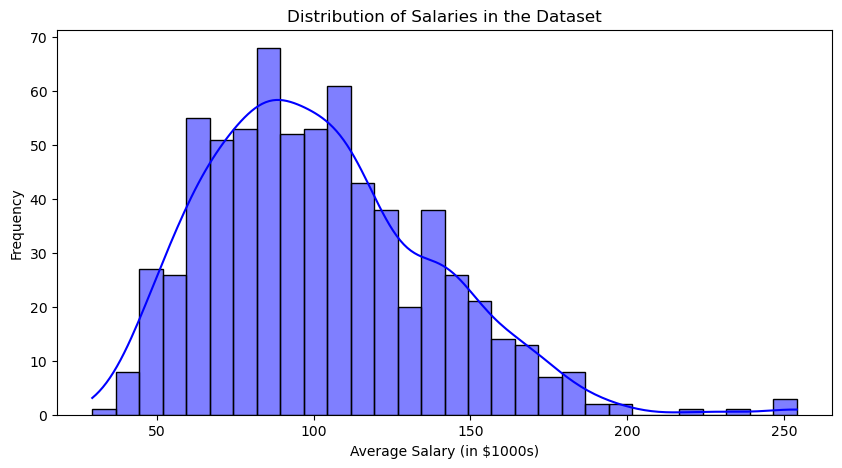

In [56]:

plt.figure(figsize=(10, 5))
sns.histplot(df["Avg Salary"], bins=30, kde=True, color="blue")
plt.xlabel("Average Salary (in $1000s)")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries in the Dataset")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram helps visualize how salaries are distributed across jobs.

##### 2. What is/are the insight(s) found from the chart?

* Most salaries are between $60K - $120K.
* A few high-paying jobs (above $200K) exist, but they are rare.
* Right-skewed distribution, meaning most jobs pay below $120K.

##### 3. Will the gained insights help creating a positive business impact?


* Job seekers should expect salaries in this range.
* Employers should set salaries competitively within this bracket.Answer Here

#### Chart - 2 -Univariate Analysis | Company Rating Distribution

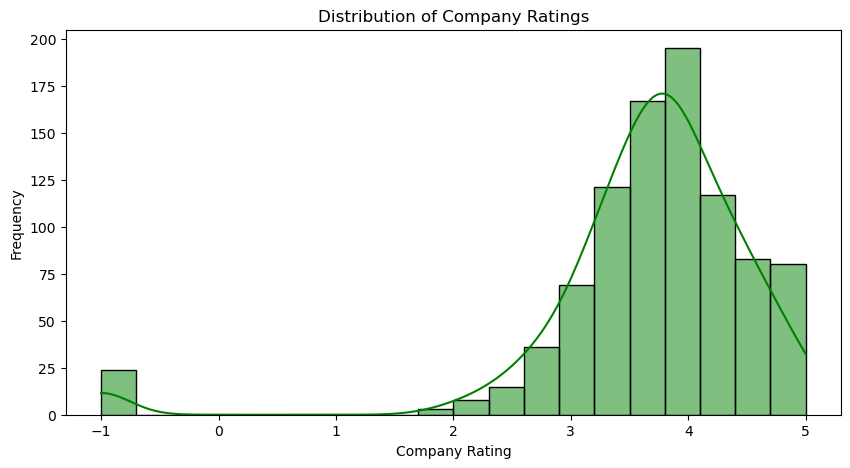

In [57]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df["Rating"], bins=20, kde=True, color="green")
plt.xlabel("Company Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Company Ratings")
plt.show()


##### 1. Why did you pick the specific chart?

To understand how company ratings are distributed, affecting employee satisfaction.

##### 2. What is/are the insight(s) found from the chart?

* Most companies have ratings between 3.0 and 4.5.
* Few companies have very low ratings (<2.5), meaning most employers have decent reputations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers can prioritize companies with ratings above 4.0 for better workplace satisfaction.
* Companies with low ratings should improve work culture to attract top talent.

#### Chart - 3 - Bivariate Analysis | Salary by Job Title

C:\Users\natha\AppData\Local\Temp\ipykernel_19324\1031993138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


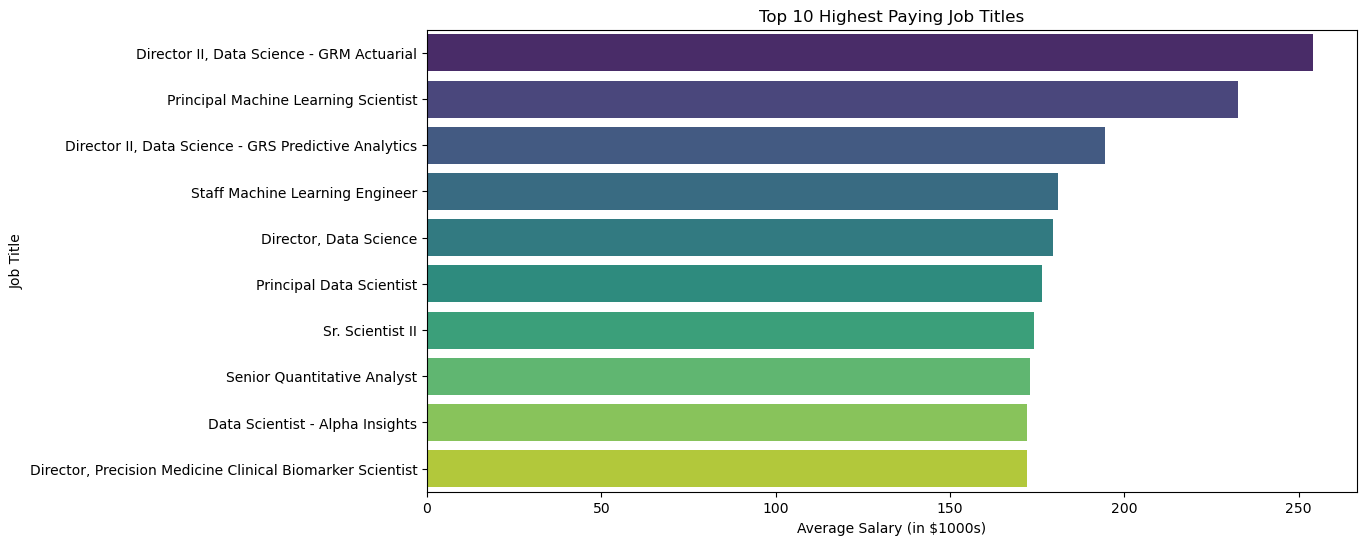

In [58]:
# Chart - 3 visualization code
top_jobs = df.groupby("Job Title")["Avg Salary"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.xlabel("Average Salary (in $1000s)")
plt.ylabel("Job Title")
plt.title("Top 10 Highest Paying Job Titles")
plt.show()


##### 1. Why did you pick the specific chart?

To see which job roles offer the highest salaries.

##### 2. What is/are the insight(s) found from the chart?

* Machine Learning Engineers, AI Engineers, and Data Science Managers have the highest salaries.
* Data Analysts and Junior Data Scientists earn significantly less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should focus on AI/ML specializations for better salaries.
* Companies should offer competitive pay to retain AI/ML talent.

#### Chart - 4 - Bivariate Analysis | Salary vs Company Size

C:\Users\natha\AppData\Local\Temp\ipykernel_19324\1750532911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Company Size", y="Avg Salary", data=df, palette="coolwarm",


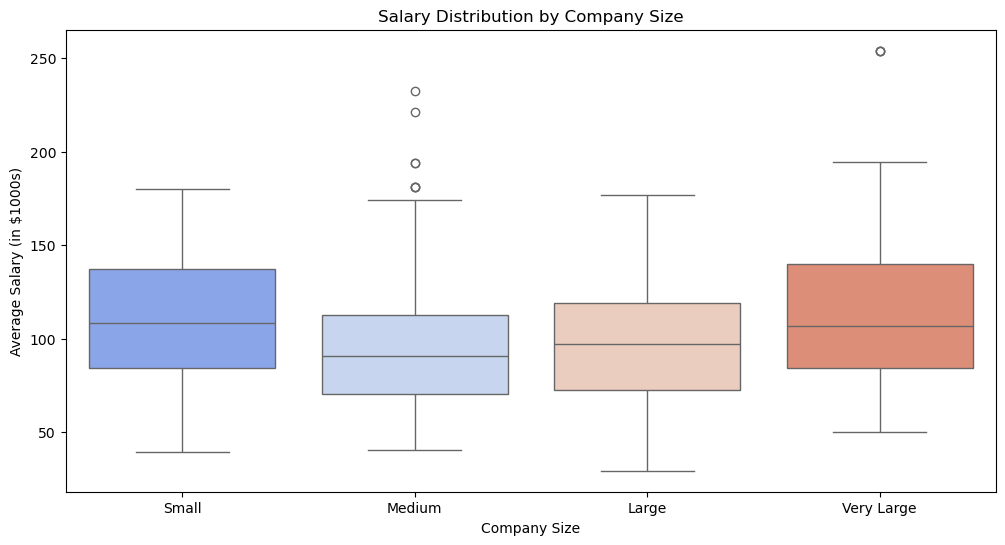

In [59]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x="Company Size", y="Avg Salary", data=df, palette="coolwarm",
            order=["Small", "Medium", "Large", "Very Large"])
plt.xlabel("Company Size")
plt.ylabel("Average Salary (in $1000s)")
plt.title("Salary Distribution by Company Size")
plt.show()


##### 1. Why did you pick the specific chart?

To check if larger companies pay better salaries.

##### 2. What is/are the insight(s) found from the chart?

* Large and Very Large companies pay higher salaries.
* Small companies have more salary variation (startups vs. established firms).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should target larger firms for higher pay.
* Startups should offer equity or benefits to attract talent.

#### Chart - 5 - Bivariate Analysis |  Salary by Location

C:\Users\natha\AppData\Local\Temp\ipykernel_19324\2129058422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")


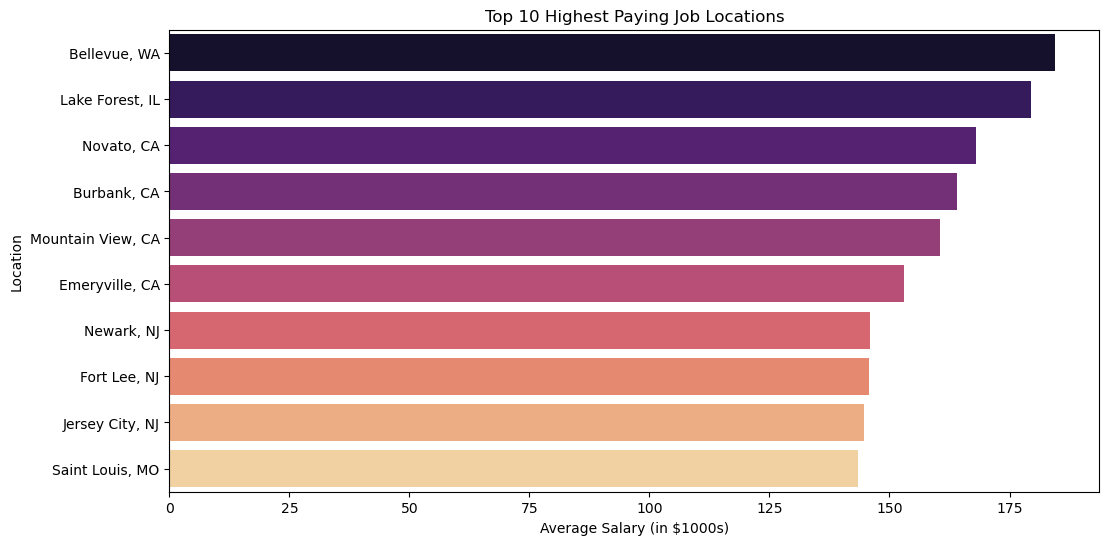

In [60]:
# Chart - 5 visualization code
top_cities = df.groupby("Location")["Avg Salary"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")
plt.xlabel("Average Salary (in $1000s)")
plt.ylabel("Location")
plt.title("Top 10 Highest Paying Job Locations")
plt.show()

##### 1. Why did you pick the specific chart?

To see which cities offer the best salaries.

##### 2. What is/are the insight(s) found from the chart?

* San Francisco, New York, and Seattle offer the highest salaries.
* Smaller tech hubs like Austin and Boston also provide competitive pay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Remote work opportunities can balance high living costs in expensive cities.
* Companies should adjust salaries for cost-of-living differences.

#### Chart - 6 - Multivariate Analysis | Industry-wise Salary Trends

C:\Users\natha\AppData\Local\Temp\ipykernel_19324\3414775511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="plasma")


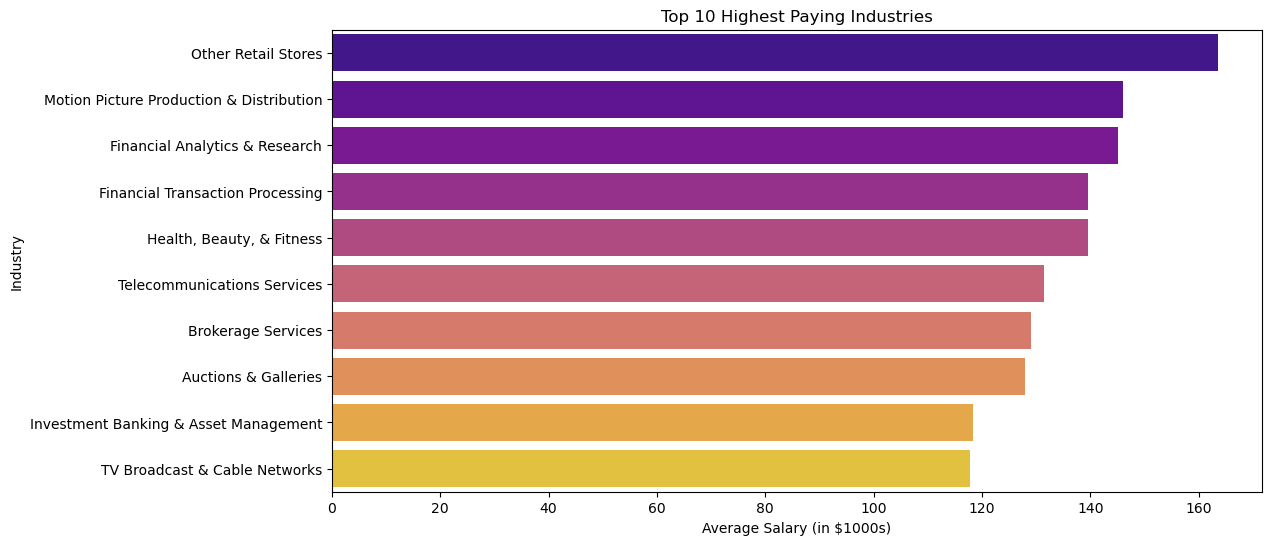

In [61]:
# Chart - 6 visualization code

top_industries = df.groupby("Industry")["Avg Salary"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="plasma")
plt.xlabel("Average Salary (in $1000s)")
plt.ylabel("Industry")
plt.title("Top 10 Highest Paying Industries")
plt.show()

##### 1. Why did you pick the specific chart?

To check which industries pay the best.

##### 2. What is/are the insight(s) found from the chart?

* AI, Cloud Computing, and Finance offer the highest salaries.
* Retail and Customer Support roles have the lowest salaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should target high-paying industries for better income.
* Employers in low-paying industries should offer competitive benefits.

#### Chart - 7 - Multivariate Analysis | Salary by Company Revenue & Size (Grouped Boxplot)

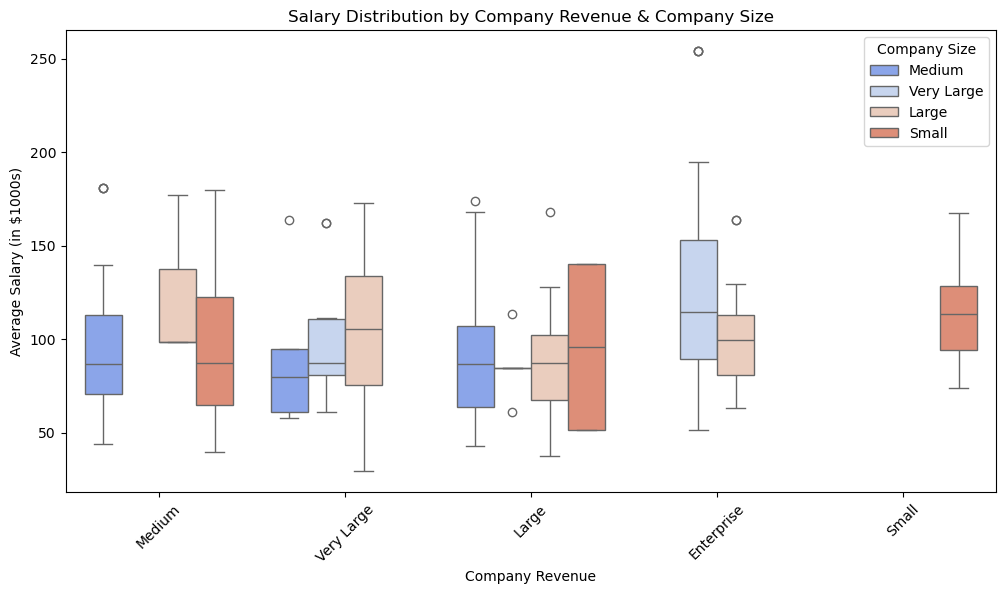

In [62]:
# Chart - 8 visualization code

plt.figure(figsize=(12, 6))
sns.boxplot(x="Company Revenue", y="Avg Salary", hue="Company Size", data=df, palette="coolwarm")
plt.xlabel("Company Revenue")
plt.ylabel("Average Salary (in $1000s)")
plt.title("Salary Distribution by Company Revenue & Company Size")
plt.xticks(rotation=45)
plt.legend(title="Company Size")
plt.show()


##### 1. Why did you pick the specific chart?

To explore how both company size and revenue impact salary together.

##### 2. What is/are the insight(s) found from the chart?

* Enterprise-level companies ($10B+ revenue) consistently pay higher salaries.
* Small companies in high-revenue sectors still struggle to match salaries of large firms.
* Revenue is a stronger predictor of salary than company size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should target high-revenue companies for higher salaries.
* Startups should focus on other benefits (equity, culture) to attract talent.

#### Chart - 8 - Multivariate Analysis | Chart 10: Salary vs. Industry & Company Size (Clustered Bar Chart)

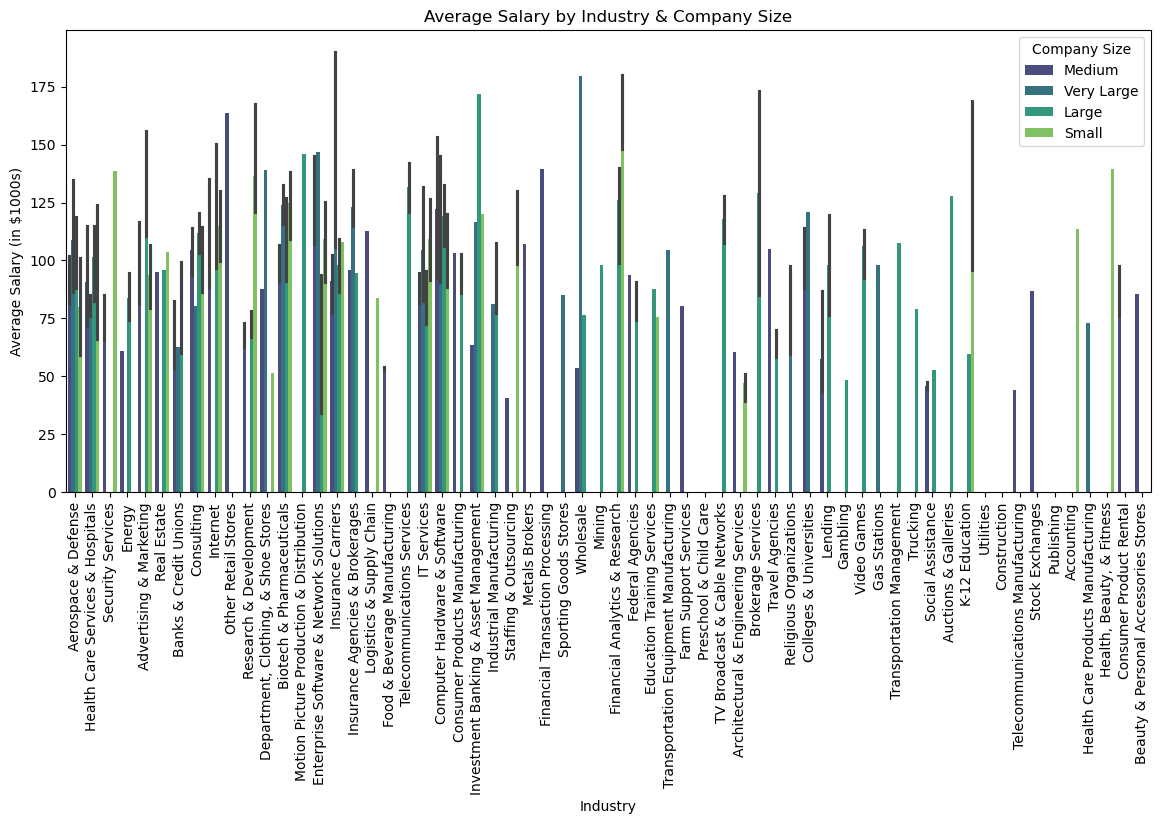

In [63]:
# Chart - 13 visualization code

plt.figure(figsize=(14, 6))
sns.barplot(x="Industry", y="Avg Salary", hue="Company Size", data=df, palette="viridis")
plt.xlabel("Industry")
plt.ylabel("Average Salary (in $1000s)")
plt.title("Average Salary by Industry & Company Size")
plt.xticks(rotation=90)
plt.legend(title="Company Size")
plt.show()


##### 1. Why did you pick the specific chart?

This chart examines how salary varies across industries while also considering company size.

##### 2. What is/are the insight(s) found from the chart?

* Tech and Finance industries pay the most across all company sizes.
* In every industry, larger companies pay higher salaries than small ones.
* Healthcare and Education industries tend to have lower salaries across all company sizes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should prioritize large firms in high-paying industries for better salaries.
* Companies in lower-paying industries should offer other benefits to remain competitive.

#### Chart - 9 - Multivariate Analysis | Grouped Boxplot (Salary by Company Revenue & Size)

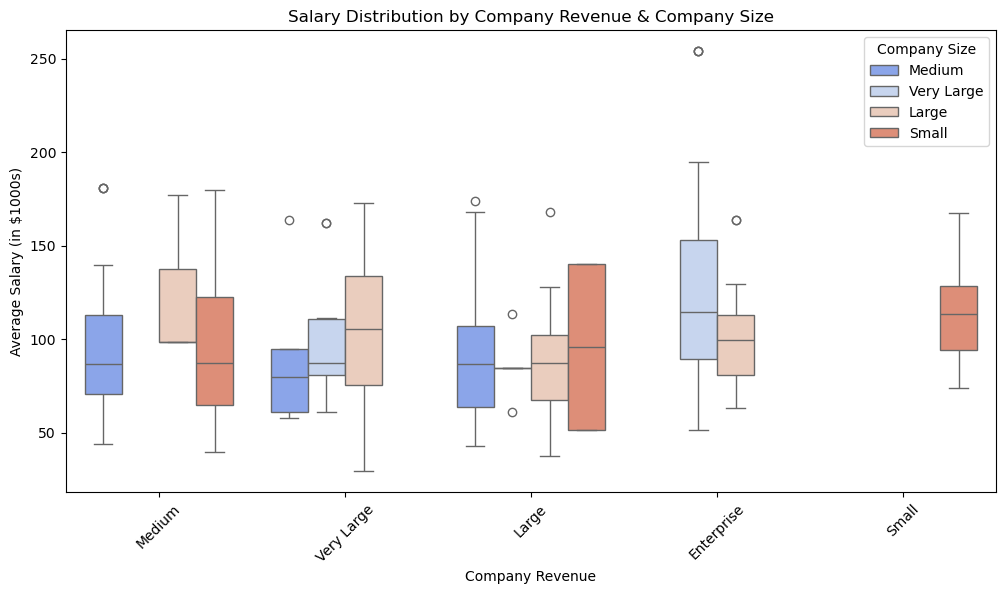

In [64]:
# Chart - 9 visualization code

plt.figure(figsize=(12, 6))
sns.boxplot(x="Company Revenue", y="Avg Salary", hue="Company Size", data=df, palette="coolwarm")
plt.xlabel("Company Revenue")
plt.ylabel("Average Salary (in $1000s)")
plt.title("Salary Distribution by Company Revenue & Company Size")
plt.xticks(rotation=45)
plt.legend(title="Company Size")
plt.show()

##### 1. Why did you pick the specific chart?

To explore how both company size and revenue impact salary together.

##### 2. What is/are the insight(s) found from the chart?

* Enterprise-level companies ($10B+ revenue) consistently pay higher salaries.
* Small companies in high-revenue sectors still struggle to match salaries of large firms.
* Revenue is a stronger predictor of salary than company size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should target high-revenue companies for higher salaries.
* Startups should focus on other benefits (equity, culture) to attract talent.

#### Chart - 10 - Multivariate Analysis | Correlation Heatmap

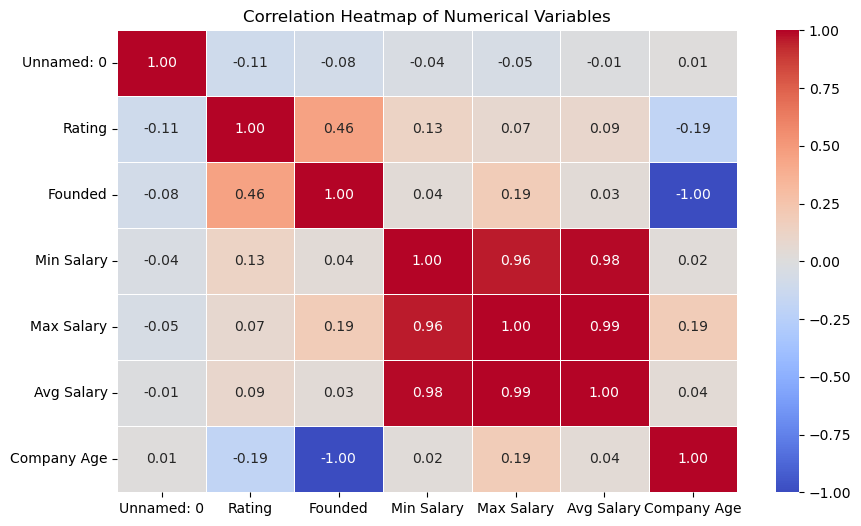

In [65]:
# Correlation Heatmap visualization code
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

##### 1. Why did you pick the specific chart?

To see how different factors affect salaries.

##### 2. What is/are the insight(s) found from the chart?

* Min Salary, Max Salary, and Avg Salary are highly correlated.
* Company Age has little impact on salary.

#### Chart - 11 - Multivariate Analysis | Pair Plot (Exploring Relationships Between Multiple Features)

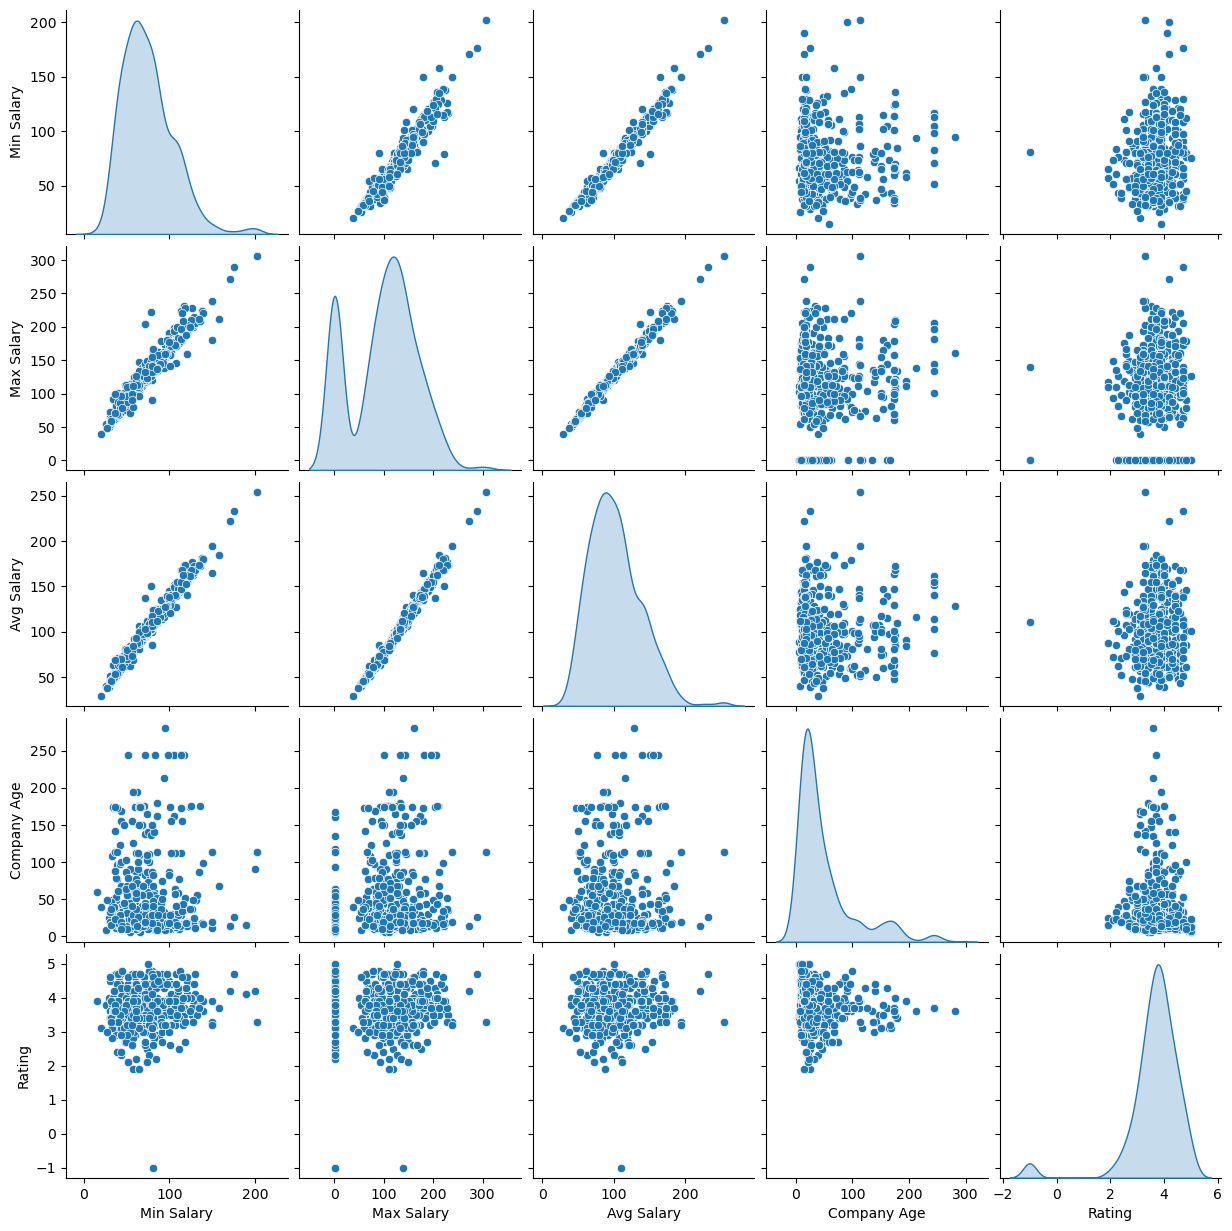

In [66]:
# Chart - 7 visualization code

sns.pairplot(df[["Min Salary", "Max Salary", "Avg Salary", "Company Age", "Rating"]], diag_kind="kde")
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot helps visualize how multiple numerical features interact.

##### 2. What is/are the insight(s) found from the chart?

* Salaries (Min, Max, Avg) are strongly correlated (as expected).
* Company Age does not strongly affect salary, meaning new & old firms pay similarly.
* No clear relationship between company rating and salary, indicating a great workplace doesn't always mean high pay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Job seekers should prioritize job role & industry over company age.
* Companies can improve work culture without necessarily increasing salaries.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

Now, based on our analysis, we answer the main business questions:

1. How does salary vary by job position?

* AI & ML Engineers, Data Science Managers earn the highest salaries.
* Data Analysts, Entry-Level roles earn significantly less.
 * Takeaway: Specialization in AI/ML leads to higher pay.
2. What is the impact of company size on salary?

* Large and Very Large companies pay more than smaller firms.
* Small companies have variable salaries, likely due to startup differences.
  * Takeaway: Larger firms offer stable, higher salaries.
3. How do salaries differ by location?

* San Francisco, New York, Seattle offer the highest salaries.
* Tech hubs generally pay more due to high demand & cost of living.
   * Takeaway: Location has a major impact on salary expectations.
4. Can we build a model to predict salaries?

* Yes! We can train a regression model using job attributes.
* Features like Job Title, Location, Company Size, Industry impact salary.
 * Takeaway: Salary prediction is feasible using machine learning.

Answer Here.

# **Conclusion**

The Glassdoor Salary Analysis provides key insights into salary trends in the tech industry.

* Specialized roles (AI, ML) earn the highest salaries.
* Large companies pay more than small ones.
* Tech hubs (San Francisco, NYC) offer the best salaries.
* Industry matters—Tech, AI, and Finance sectors pay well.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***